In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score


In [5]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.isnull().sum()


Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [9]:
X = df.drop("Outcome", axis=1)   # features
y = df["Outcome"]                # target (0 = No Diabetes, 1 = Diabetes)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)   # You can tune k later
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_test)

✅ Accuracy: 0.6823
❌ Error Rate: 0.3177
🎯 Precision: 0.5606
🔁 Recall: 0.5362


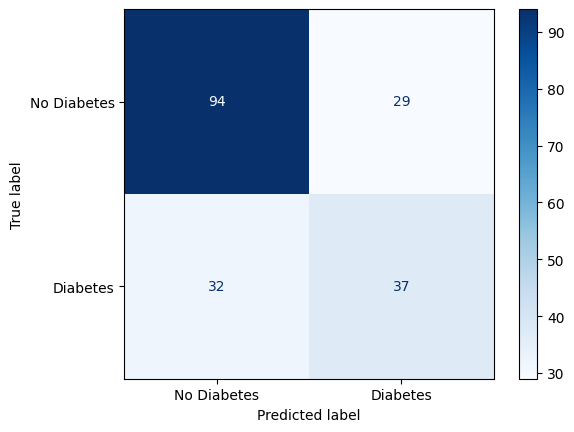

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])
disp.plot(cmap="Blues")

# Metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.4f}")
print(f"❌ Error Rate: {error_rate:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall: {recall:.4f}")


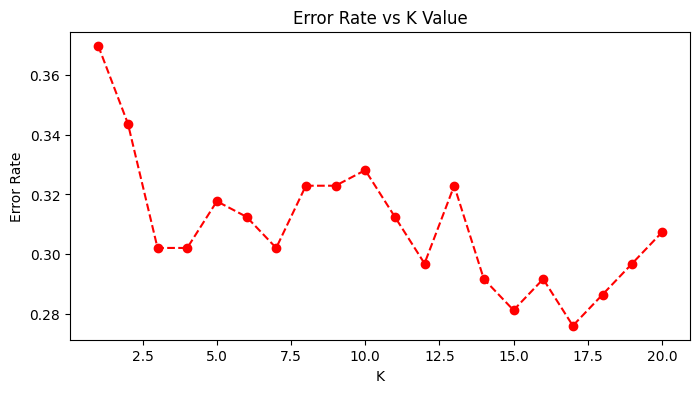

In [21]:
#optional

error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rates.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,21), error_rates, color='red', linestyle='dashed', marker='o')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
